In [27]:
import pandas as pd

In [28]:
df = pd.read_csv('train.csv')

In [29]:
df

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


In [30]:
from ydata_profiling import ProfileReport

In [31]:
profile = ProfileReport(df,explorative=True)
profile.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 38.21it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
for x in df.columns:
    print(f'{x} column')
    print(df[x].isnull().sum())


id column
0
Time_spent_Alone column
1190
Stage_fear column
1893
Social_event_attendance column
1180
Going_outside column
1466
Drained_after_socializing column
1149
Friends_circle_size column
1054
Post_frequency column
1264
Personality column
0


In [33]:
for x in df.columns :
    print(f'{x} column')
    print(df[x].unique())

id column
[    0     1     2 ... 18521 18522 18523]
Time_spent_Alone column
[ 0.  1.  6.  3.  2.  4. nan  5.  9. 10.  7.  8. 11.]
Stage_fear column
['No' 'Yes' nan]
Social_event_attendance column
[ 6.  7.  1.  4.  8.  2.  5. nan  0.  9.  3. 10.]
Going_outside column
[ 4.  3.  0.  5. nan  1.  6.  2.  7.]
Drained_after_socializing column
['No' nan 'Yes']
Friends_circle_size column
[15. 10.  3. 11. 13. nan  4.  0. 14.  5.  9. 12.  8.  2.  1.  6.  7.]
Post_frequency column
[ 5.  8.  0. nan  3.  4.  2.  9. 10.  6.  7.  1.]
Personality column
['Extrovert' 'Introvert']


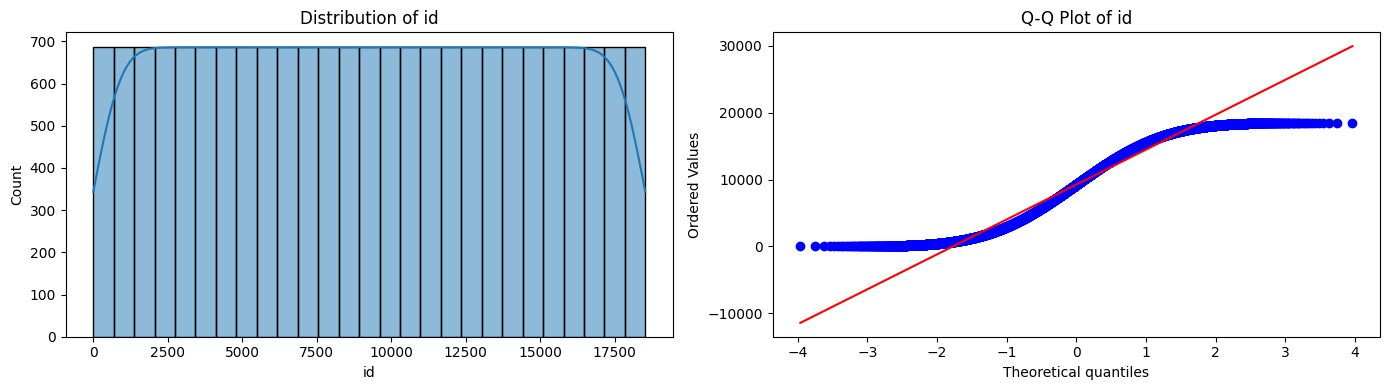

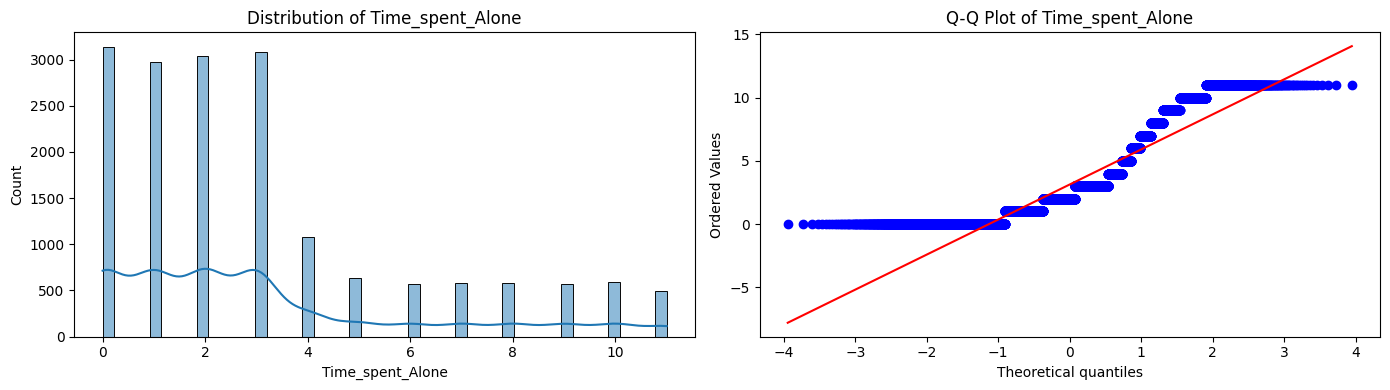

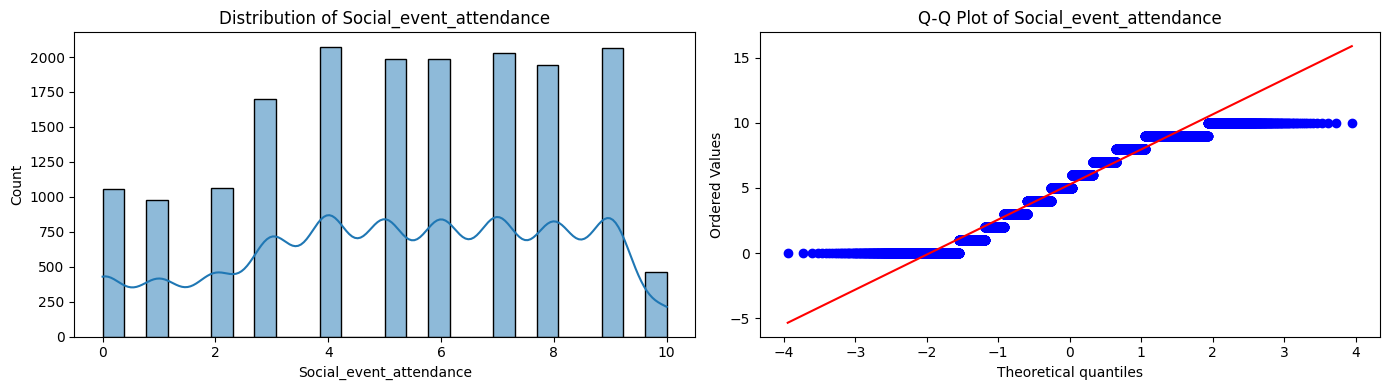

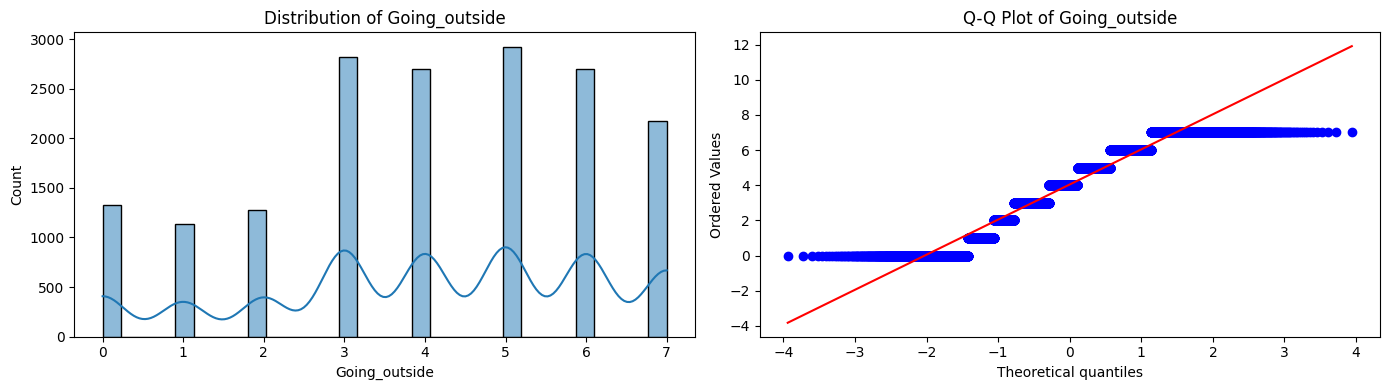

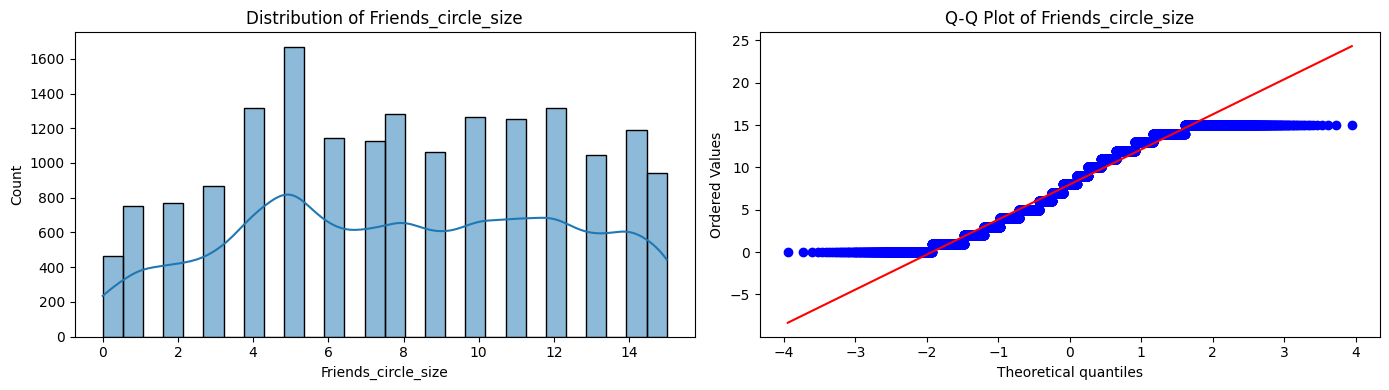

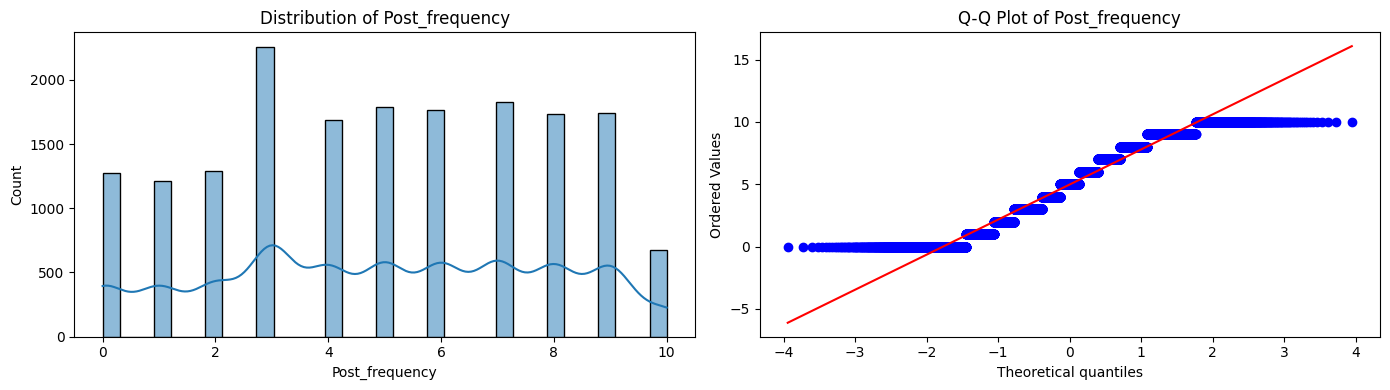

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Only for Jupyter notebooks
%matplotlib inline

numerical_columns = df.drop(columns=['Stage_fear', 'Drained_after_socializing', 'Personality']).copy()

for col in numerical_columns.columns:
    plt.figure(figsize=(14, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')

    plt.tight_layout()
    plt.show()
    plt.close()  # ✅ prevent memory warnings


In [35]:
for x in df.columns :
    print(f'{x} column')
    print(df[x].isnull().mean()*100)

id column
0.0
Time_spent_Alone column
6.4240984668538115
Stage_fear column
10.219175124163247
Social_event_attendance column
6.370114446123948
Going_outside column
7.914057438998057
Drained_after_socializing column
6.202763981861369
Friends_circle_size column
5.689915784927662
Post_frequency column
6.823580220254804
Personality column
0.0


In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import numpy as np

In [54]:
numerical_columns = df.drop(columns=['Stage_fear', 'Drained_after_socializing', 'Personality'])
for x in numerical_columns.columns :
    avg = df[x].mean()
    df[x].replace(np.nan,avg,inplace=True)

    

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12240\4024182612.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[x].replace(np.nan,avg,inplace=True)


In [55]:
df

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.000000,No,6.0,4.0,No,15.0,5.000000,Extrovert
1,1,1.000000,No,7.0,3.0,No,10.0,8.000000,Extrovert
2,2,6.000000,Yes,1.0,0.0,NaN,3.0,0.000000,Introvert
3,3,3.000000,No,7.0,3.0,No,11.0,5.000000,Extrovert
4,4,1.000000,No,4.0,4.0,No,13.0,4.982097,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.000000,No,7.0,3.0,No,9.0,7.000000,Extrovert
18520,18520,1.000000,NaN,6.0,7.0,No,6.0,5.000000,Extrovert
18521,18521,7.000000,Yes,1.0,1.0,Yes,1.0,4.982097,Introvert
18522,18522,3.137764,Yes,1.0,0.0,Yes,5.0,2.000000,Introvert


In [56]:
df = df.drop(columns=['Stage_fear','Drained_after_socializing'])

In [57]:
df

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality
0,0,0.000000,6.0,4.0,15.0,5.000000,Extrovert
1,1,1.000000,7.0,3.0,10.0,8.000000,Extrovert
2,2,6.000000,1.0,0.0,3.0,0.000000,Introvert
3,3,3.000000,7.0,3.0,11.0,5.000000,Extrovert
4,4,1.000000,4.0,4.0,13.0,4.982097,Extrovert
...,...,...,...,...,...,...,...
18519,18519,3.000000,7.0,3.0,9.0,7.000000,Extrovert
18520,18520,1.000000,6.0,7.0,6.0,5.000000,Extrovert
18521,18521,7.000000,1.0,1.0,1.0,4.982097,Introvert
18522,18522,3.137764,1.0,0.0,5.0,2.000000,Introvert


In [64]:
df2 = pd.read_csv("new_df",usecols=['Stage_fear1','Drained_after_socializing1'])

In [70]:
df2.head()

,Stage_fear1,Drained_after_socializing1
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [89]:
df3 = pd.concat([df, df2],axis=1)
df3.head()


,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear1,Drained_after_socializing1
0,0,0.0,6.0,4.0,15.0,5.000000,Extrovert,0,0
1,1,1.0,7.0,3.0,10.0,8.000000,Extrovert,0,0
2,2,6.0,1.0,0.0,3.0,0.000000,Introvert,1,0
3,3,3.0,7.0,3.0,11.0,5.000000,Extrovert,0,0
4,4,1.0,4.0,4.0,13.0,4.982097,Extrovert,0,0


In [90]:
for x in df.columns :
    print(f'{x} column')
    print(df[x].isnull().mean()*100)

id column
0.0
Time_spent_Alone column
0.0
Social_event_attendance column
0.0
Going_outside column
0.0
Friends_circle_size column
0.0
Post_frequency column
0.0
Personality column
0.0


In [96]:
df_final = df3.drop(columns=['id'])

In [97]:
df_final.to_csv('df_final.csv')

In [98]:
df_final = pd.read_csv('df_final.csv')

In [99]:
df_final.head()

,Unnamed: 0,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear1,Drained_after_socializing1
0,0,0.0,6.0,4.0,15.0,5.000000,Extrovert,0,0
1,1,1.0,7.0,3.0,10.0,8.000000,Extrovert,0,0
2,2,6.0,1.0,0.0,3.0,0.000000,Introvert,1,0
3,3,3.0,7.0,3.0,11.0,5.000000,Extrovert,0,0
4,4,1.0,4.0,4.0,13.0,4.982097,Extrovert,0,0


In [100]:
df_final.drop(columns=['Unnamed: 0'],inplace=True)

In [101]:
df_final

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear1,Drained_after_socializing1
0,0.000000,6.0,4.0,15.0,5.000000,Extrovert,0,0
1,1.000000,7.0,3.0,10.0,8.000000,Extrovert,0,0
2,6.000000,1.0,0.0,3.0,0.000000,Introvert,1,0
3,3.000000,7.0,3.0,11.0,5.000000,Extrovert,0,0
4,1.000000,4.0,4.0,13.0,4.982097,Extrovert,0,0
...,...,...,...,...,...,...,...,...
18519,3.000000,7.0,3.0,9.0,7.000000,Extrovert,0,0
18520,1.000000,6.0,7.0,6.0,5.000000,Extrovert,0,0
18521,7.000000,1.0,1.0,1.0,4.982097,Introvert,1,1
18522,3.137764,1.0,0.0,5.0,2.000000,Introvert,1,1


In [103]:
numerical_columns = df_final.drop(columns=['Personality'])

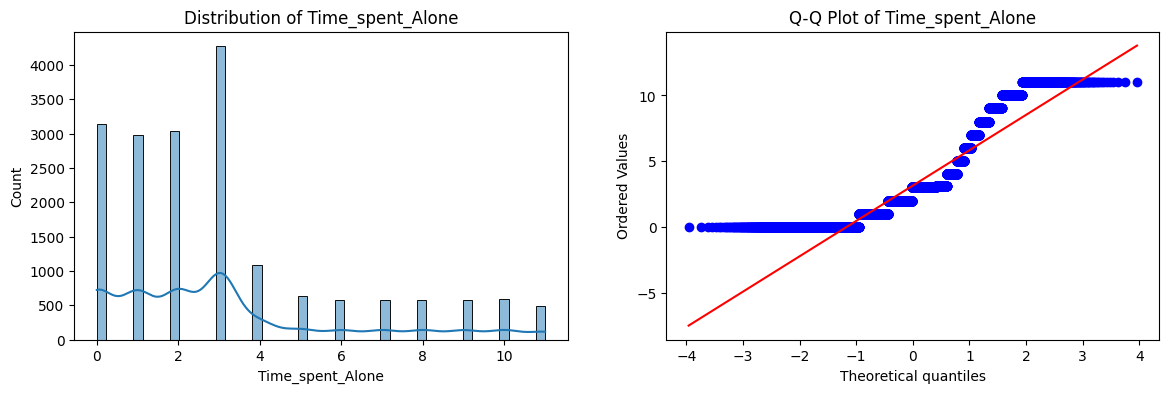

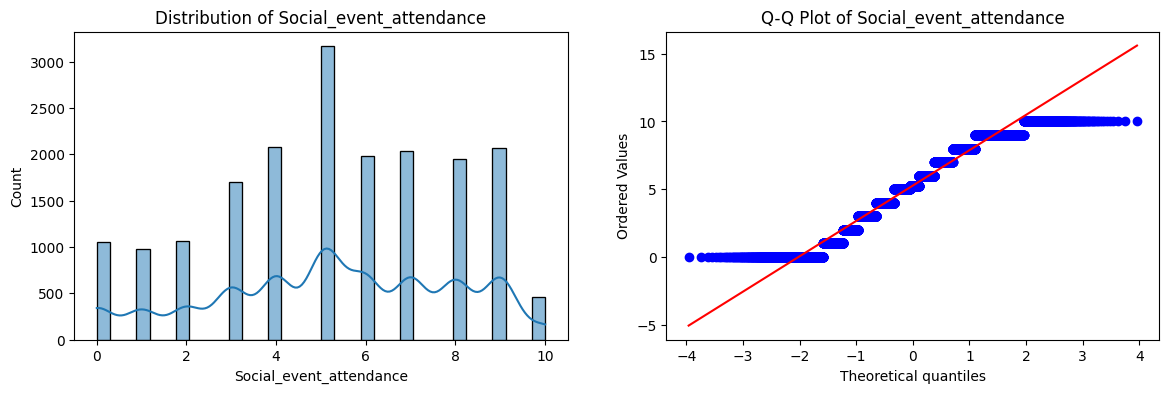

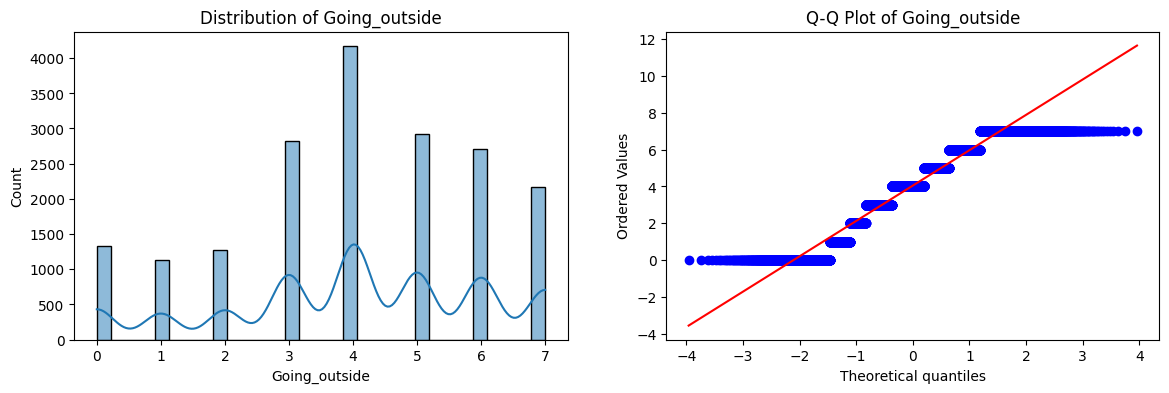

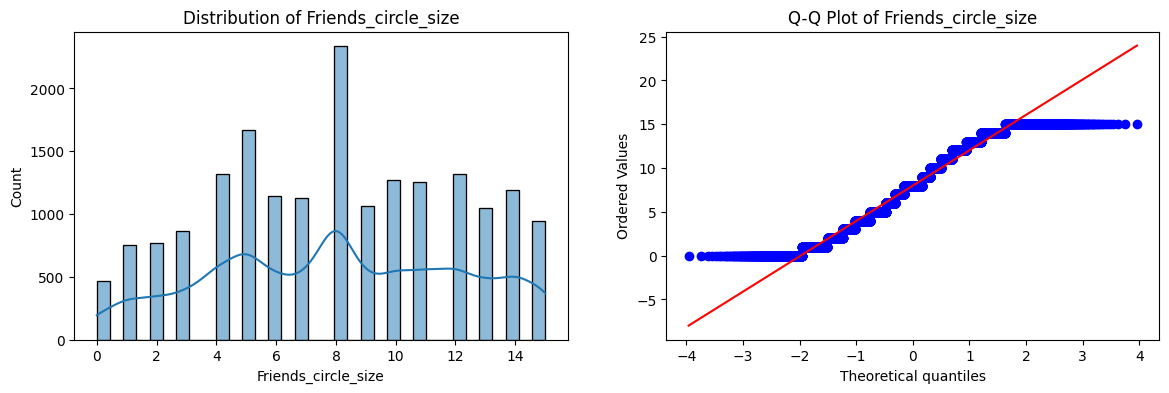

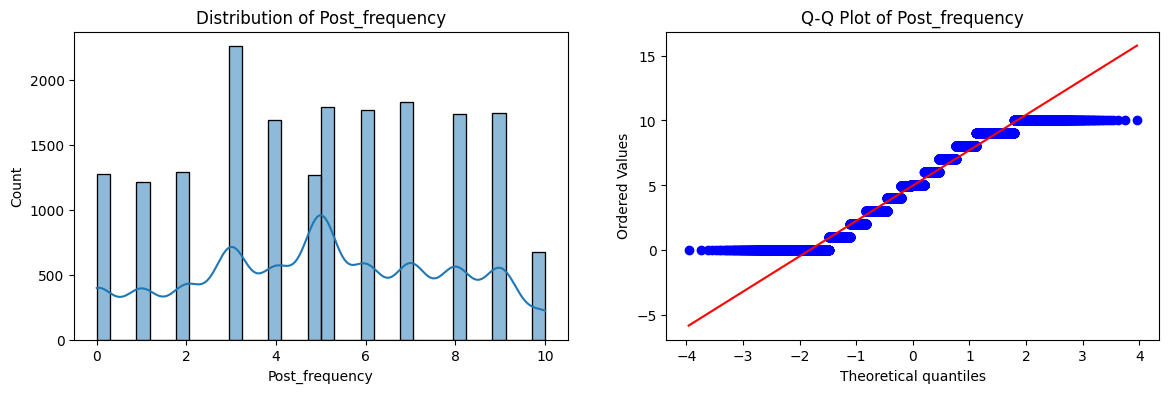

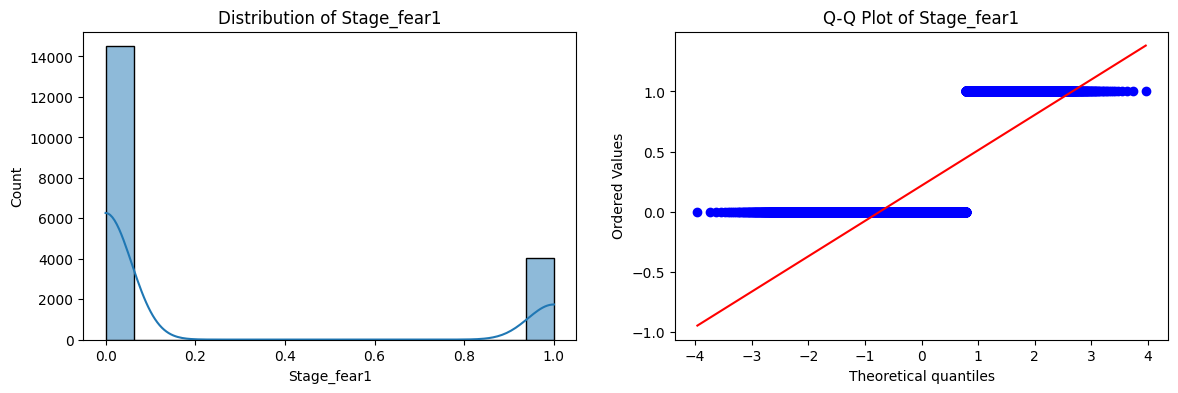

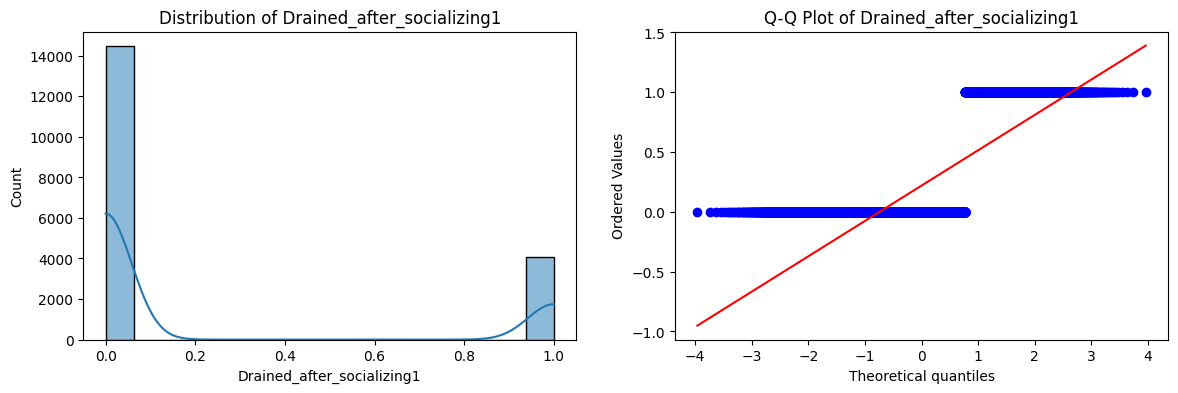

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Only for Jupyter notebooks
%matplotlib inline

for col in numerical_columns.columns:
    plt.figure(figsize=(14, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_final[col], kde=True)
    plt.title(f'Distribution of {col}')

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(df_final[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')

    plt.show()
 


In [106]:
from sklearn.model_selection import train_test_split

In [108]:
x = df_final.drop(columns=['Personality'])
y = df['Personality']
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state=42)

In [109]:
x_train.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear1,Drained_after_socializing1
1799,1.0,7.0,4.000000,10.0,5.0,0,0
11931,2.0,4.0,6.000000,6.0,8.0,0,0
14307,4.0,5.0,5.000000,7.0,6.0,0,0
12157,3.0,6.0,4.044319,8.0,8.0,0,0
18124,2.0,7.0,7.000000,15.0,4.0,0,0


In [112]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

In [ ]:
log_transformation = x_train['Time_spent_Alone']
power_transformation
trf = ColumnTransformer([
    ('log transformation',FunctionTransformer(func=np.log1p),df_final['Time_spent_Alone']),
    ('power transformation',PowerTransformer(method='yeo-johnson'),df_final[['']])
],remainder = 'passthrough')